# Visualizacion de datos con Matplotlib

A continuación veremos en profundidad el **paquete [Matplotlib](https://matplotlib.org/) para la visualización en Python**.
Matplotlib es una librería de visualización de datos **multiplataforma** construida sobre arrays **NumPy**, y diseñada para trabajar con la pila más amplia de **SciPy**.
Fue creada por John Hunter en 2002, originalmente como un parche para IPython para permitir el trazado interactivo al estilo MATLAB a través de [gnuplot](http://www.gnuplot.info/) desde la línea de comandos de IPython.
El creador de IPython, Fernando Pérez, estaba en ese momento luchando por terminar su doctorado, y le hizo saber a John que no tendría tiempo para revisar el parche durante varios meses.
John tomó esto como una señal para emprender su propio camino, y el paquete Matplotlib nació, con la versión 0.1 publicada en 2003.
Recibió un impulso temprano cuando fue adoptado como el paquete de trazado de elección del Space Telescope Science Institute (la gente detrás del telescopio Hubble), que apoyó financieramente el desarrollo de Matplotlib y amplió en gran medida sus capacidades.

Una de las características más importantes de Matplotlib es su **capacidad de funcionar bien con muchos sistemas operativos y backends de gráficos.**
Matplotlib soporta **docenas de backends y tipos de salida**, lo que significa que puedes contar con él para trabajar independientemente del sistema operativo que estés usando o del formato de salida que desees.
Este enfoque de **multiplataforma**, de todo a todo, ha sido uno de los grandes puntos fuertes de Matplotlib.
Ha conducido a una gran base de usuarios, que a su vez ha conducido a una activa base de desarrolladores y a las poderosas herramientas de Matplotlib y su ubicuidad dentro del mundo científico de Python.

En los últimos años, sin embargo, la interfaz y el estilo de Matplotlib han comenzado a mostrar su edad.
**Nuevas herramientas como ggplot y ggvis en el lenguaje R, junto con conjuntos de herramientas de visualización web basados en D3js y HTML5 canvas, a menudo hacen que Matplotlib se sienta torpe y anticuado.
Aun así, soy de la opinión de que no podemos ignorar la fuerza de Matplotlib como motor gráfico bien probado y multiplataforma.
Las versiones recientes de Matplotlib hacen que sea relativamente fácil establecer **nuevos estilos de trazado global**, y **la gente ha estado desarrollando nuevos paquetes** que se basan en sus potentes componentes internos para manejar Matplotlib a través de APIs más limpias y modernas-por ejemplo, **Seaborn**, [ggpy](http://yhat.github.io/ggpy/), [HoloViews](http://holoviews.org/), [Altair](http://altair-viz.github.io/), e **incluso el propio Pandas** se pueden utilizar como envolturas alrededor de la API de Matplotlib.
Incluso con envoltorios como estos, **a menudo es útil sumergirse en la sintaxis de Matplotlib para ajustar la salida final del gráfico.**
Por esta razón, creo que Matplotlib seguirá siendo una pieza vital de la pila de visualización de datos, incluso si las nuevas herramientas significan que la comunidad se aleja gradualmente del uso de la API de Matplotlib directamente.

## Trucos de Matplotlib en general

Antes de sumergirnos en los detalles de la creación de visualizaciones con Matplotlib, hay algunas cosas útiles que deberías saber sobre el uso del paquete.

### Importar Matplotlib

Al igual que utilizamos la abreviatura ``np`` para NumPy y la abreviatura ``pd`` para Pandas, utilizaremos algunas abreviaturas estándar para las importaciones de Matplotlib:

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

La interfaz ``plt`` es la que utilizaremos más a menudo, como veremos a lo largo de este capítulo.

### Ajustes del estilo

Utilizaremos la directiva ``plt.style`` para elegir los [estilos](https://matplotlib.org/3.2.1/gallery/style_sheets/style_sheets_reference.html) estéticos adecuados  para nuestras figuras.
Aquí estableceremos el estilo ``clásico``, que asegura que los gráficos que creemos utilicen el estilo clásico de Matplotlib:

In [3]:
plt.style.use('classic')

In [4]:
# Que estilos hay por defecto
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


A lo largo de esta sección, ajustaremos este estilo según sea necesario.
Tenga en cuenta que las hojas de estilo utilizadas aquí son compatibles a partir de la versión 1.5 de Matplotlib; si está utilizando una versión anterior de Matplotlib, sólo está disponible el estilo por defecto.
Para más información sobre las hojas de estilo, consulte [Personalización de Matplotlib: Configuraciones y hojas de estilo](https://matplotlib.org/3.3.1/tutorials/introductory/customizing.html).

### ¿``show()`` o no ``show()``? Cómo mostrar los gráficos

Una visualización que no se puede ver no será de mucha utilidad, pero la forma de ver los gráficos de Matplotlib depende del contexto.
El mejor uso de Matplotlib difiere dependiendo de cómo lo estés utilizando; a grandes rasgos, **los tres contextos aplicables son el uso de Matplotlib en un script, en una terminal de IPython, o en un notebook de IPython.**

#### Plotting desde un script

Si estás usando Matplotlib desde un script, la función ``plt.show()`` es tu amiga.
``plt.show()`` inicia un bucle de eventos, busca todos los objetos figurativos actualmente activos, y abre una o más ventanas interactivas que muestran su figura o figuras.

Así, por ejemplo, puedes tener un archivo llamado *myplot.py* que contenga lo siguiente:

```python
# ------- file: myplot.py ------
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 100)

plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

plt.show()
```

A continuación, puede ejecutar esta secuencia de comandos desde la línea de comandos, lo que hará que se abra una ventana con su figura:

```
$ python myplot.py
```

El comando ``plt.show()`` hace mucho bajo el capó, ya que debe interactuar con el backend gráfico interactivo de su sistema.
Los detalles de esta operación pueden variar mucho de un sistema a otro e incluso de una instalación a otra, pero matplotlib hace todo lo posible para ocultar todos estos detalles.

Una cosa a tener en cuenta: el comando **``plt.show()`` debe usarse *sólo una vez* por sesión de Python**, y se ve más a menudo al final del script.
Múltiples comandos ``show()`` pueden llevar a un comportamiento impredecible dependiente del backend, y deben ser evitados en su mayoría.

#### Plotting desde una consola de IPython

Puede ser muy conveniente utilizar Matplotlib de forma interactiva dentro de un shell de IPython.
IPython está construido para trabajar bien con Matplotlib si se especifica el modo Matplotlib.
Para habilitar este modo, puedes usar el comando mágico ``%matplotlib`` después de iniciar ``ipython``:

```ipython
In [1]: %matplotlib
Using matplotlib backend: TkAgg

In [2]: import matplotlib.pyplot as plt
```

En este punto, cualquier comando de trazado ``plt`` hará que se abra una ventana de figura, y se pueden ejecutar otros comandos para actualizar el trazado.
Algunos cambios (como la modificación de las propiedades de las líneas que ya están dibujadas) no se dibujarán automáticamente: para forzar una actualización, utilice ``plt.draw()``.
No es necesario utilizar ``plt.show()`` en modo Matplotlib.

#### Plotting desde un notebook IPython

El notebook IPython es una herramienta de análisis de datos interactiva basada en el navegador que puede combinar narrativa, código, gráficos, elementos HTML y mucho más en un único documento ejecutable.

El plotting interactivo dentro de un notebook IPython puede realizarse con el comando ``%matplotlib``, y funciona de forma similar al shell IPython.
En el cuaderno IPython, también tienes la opción de incrustar gráficos directamente en el cuaderno, con dos opciones posibles:

- ``%matplotlib notebook`` will lead to *interactive* plots embedded within the notebook
- ``%matplotlib inline`` will lead to *static* images of your plot embedded in the notebook

Generalmente se usa por ``%matplotlib inline``:

In [5]:
%matplotlib inline

Después de ejecutar este comando (debe hacerse sólo una vez por núcleo/sesión), cualquier celda dentro del cuaderno que cree un gráfico incrustará una imagen PNG del gráfico resultante:

In [6]:
import numpy as np
x = np.linspace(0, 10, 100)
x

array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
        3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
        3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
        4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
        4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
        5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
        5.55555556,  5.65656566,  5.75757576,  5.85858586,  5.95959596,
        6.06060606,  6.16161616,  6.26262626,  6.36363636,  6.46464646,
        6.56565657,  6.66666667,  6.76767677,  6.86868687,  6.96

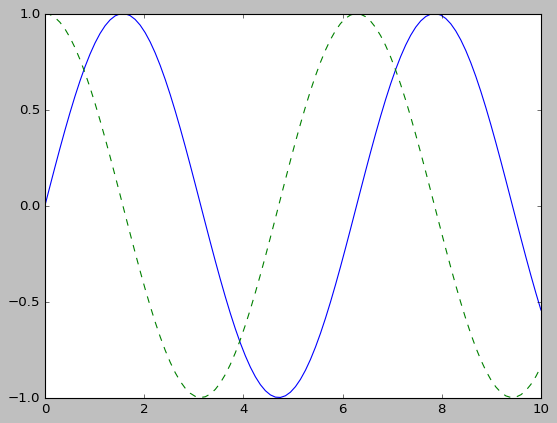

In [7]:
x = np.linspace(0, 10, 100)
fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--')

Veamos un ejemplo de unos datos más reales

In [8]:
import pandas as pd

df = pd.read_csv("data/state-population.csv")

In [9]:
df

,state/region,ages,year,population
0,AL,under18,2012,1117489.0
1,AL,total,2012,4817528.0
2,AL,under18,2010,1130966.0
3,AL,total,2010,4785570.0
4,AL,under18,2011,1125763.0
...,...,...,...,...
2539,USA,total,2010,309326295.0
2540,USA,under18,2011,73902222.0
2541,USA,total,2011,311582564.0
2542,USA,under18,2012,73708179.0


In [10]:
df_plot = df[df['state/region'] == 'USA'].pivot('year',columns='ages',values='population')

In [11]:
df_plot

ages,total,under18
year,,
1990,249622814.0,64218512.0
1991,252980942.0,65313018.0
1992,256514231.0,66509177.0
1993,259918595.0,67594938.0
1994,263125826.0,68640936.0
1995,266278403.0,69473140.0
1996,269394291.0,70233512.0
1997,272646932.0,70920738.0
1998,275854116.0,71431406.0


Si a la función `plot()` le pasamos un dataframe, pintará todas sus columnas con respecto al indice.

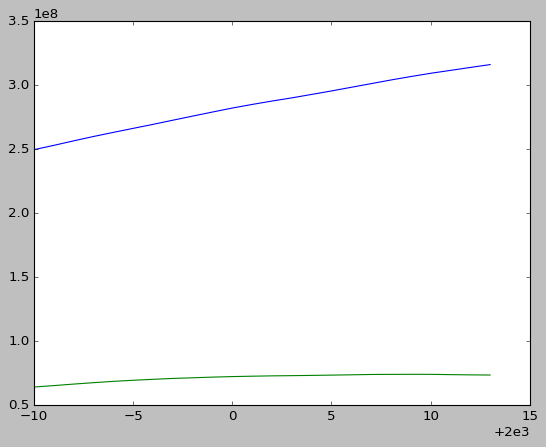

In [12]:
fig = plt.figure()
plt.plot(df_plot)

Podemos pasarle también una `pd.Series`

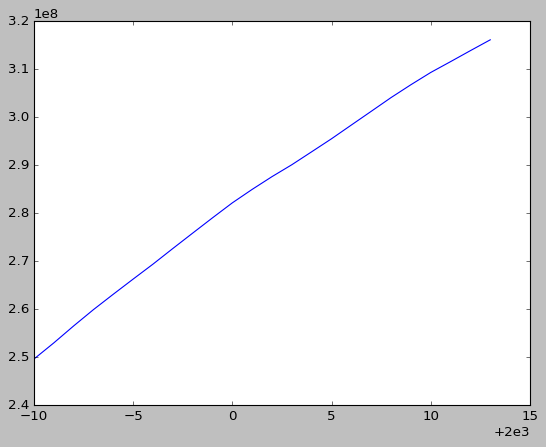

In [13]:
fig = plt.figure()
plt.plot(df_plot.total)

O podemos pasarle unos valores para el eje X y el eje Y.

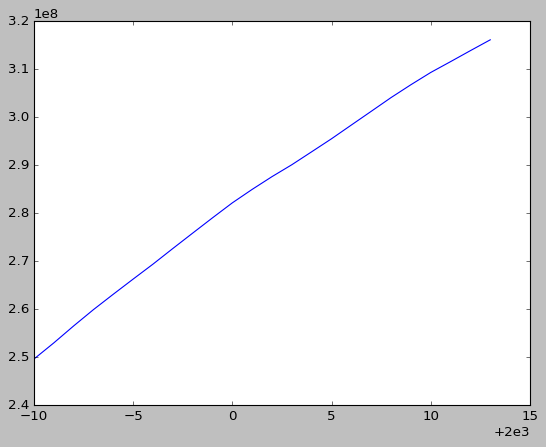

In [14]:
fig = plt.figure()
plt.plot(df_plot.index,df_plot.total)

<table align="left">
 <tr><td width="80"><img src="./img/ejercicio.png" style="width:auto;height:auto"></td>
     <td style="text-align:left">
         <h3>Ejercicio plot</h3>

      
<ol>
    <li>Genera 1000 puntos en el rango [0, 2π]</li>
    <li>Representa la función 5 - 5sen(x) en rojo</li>
    <li>Ahora utiliza plt.polar en lugar de plt.plot</li>
</ol>
         
 </td></tr>
</table>

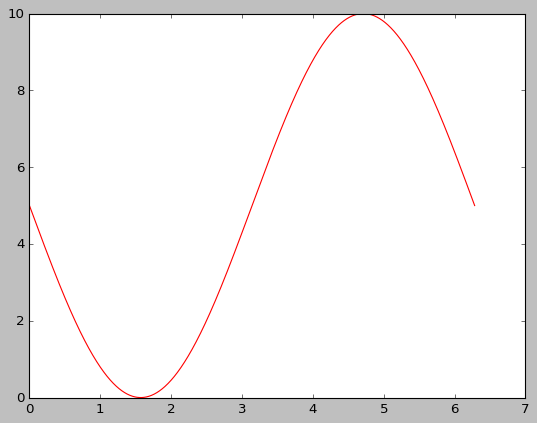

In [15]:
import math
x = np.linspace(0, (2*math.pi), 1000)
fig = plt.figure()
plt.plot(x, (5-5*np.sin(x)), color="red")

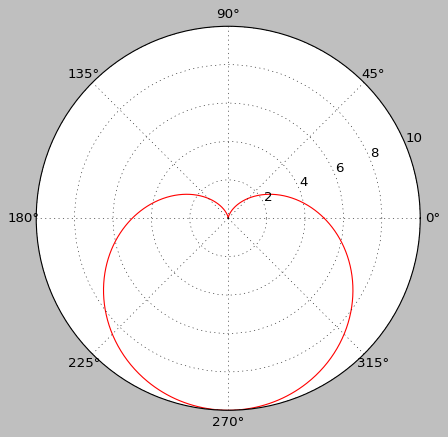

In [16]:
plt.polar(x, (5-5*np.sin(x)), '-', color="red")

### Guardando las figuras en un archivo

Una buena característica de Matplotlib es la posibilidad de guardar figuras en una amplia variedad de formatos.
Guardar una figura puede hacerse utilizando el comando ``savefig()``.
Por ejemplo, para guardar la figura anterior como un archivo PNG, puede ejecutar esto:

In [17]:
import os
os.getcwd()

'c:\\Users\\mgilj\\GitHub\\MGJ_Data_Bootcamp\\2-Data Analysis\\3-Visualizacion\\1-Matplotlib'

In [18]:
fig.savefig('my_figure.png')

Ahora tenemos un archivo llamado ``my_figure.png`` en el directorio de trabajo actual:

Para confirmar que contiene lo que creemos que contiene, vamos a utilizar el objeto ``Image`` de IPython para mostrar el contenido de este archivo:

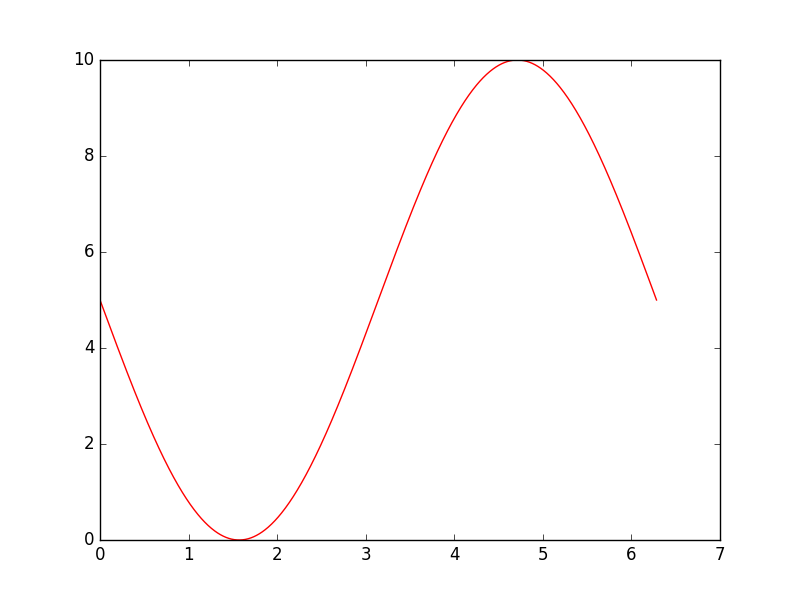

In [19]:
from IPython.display import Image
Image('my_figure.png')

En ``savefig()``, el formato de archivo se infiere a partir de la extensión del nombre de archivo dado.  
Dependiendo de los backends que tenga instalados, existen muchos formatos de archivo diferentes.  
La lista de tipos de archivo soportados se puede encontrar para su sistema utilizando el siguiente método del objeto figure canvas:

In [20]:
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

Tenga en cuenta que cuando guarde su figura, no es necesario utilizar ``plt.show()`` o los comandos relacionados que se discutieron anteriormente.

<table align="left">
 <tr><td width="80"><img src="./img/ejercicio.png" style="width:auto;height:auto"></td>
     <td style="text-align:left">
         <h3>Ejercicio plot script</h3>

      
<ol>
    <li>Realiza las mismas gráficas que en el ejercicio anterior pero en un script .py</li>
    <li>Ejecuta el script ¿Puedes ver algo?</li>
    <li>Incluye un .show() después de cada gráfica</li>
    <li>Guarda las dos imágenes en img/cardioide_cart.jpg y en img/cardioide_polar.jpg</li>
</ol>
         
 </td></tr>
</table>

## Dos interfaces por el precio de una

Una característica potencialmente confusa de Matplotlib es su doble interfaz: una cómoda interfaz basada en estados al estilo de MATLAB, y una interfaz más potente orientada a objetos. Aquí destacaremos rápidamente las diferencias entre ambas.

#### MATLAB-style Interface

**Matplotlib fue escrito originalmente como una alternativa a Python para los usuarios de MATLAB**, y gran parte de su sintaxis refleja ese hecho.
Las herramientas de estilo MATLAB están contenidas en la interfaz pyplot (``plt``).
Por ejemplo, el siguiente código probablemente resultará bastante familiar a los usuarios de MATLAB:

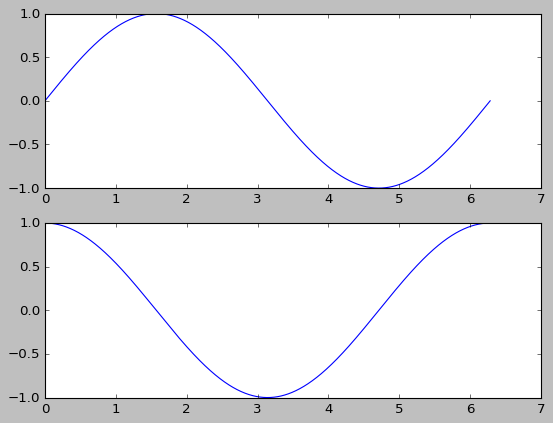

In [21]:
plt.figure()

plt.subplot(2, 1, 1)
plt.plot(x, np.sin(x))


plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x))





Es importante tener en cuenta que esta interfaz es *stateful*: mantiene un seguimiento de la figura y los ejes  "actuales", que son donde se aplican todos los comandos ``plt``.
Puedes obtener una referencia a estos usando las rutinas ``plt.gcf()`` (obtener la figura actual) y ``plt.gca()`` (obtener los ejes actuales).

Aunque esta interfaz es rápida y conveniente para los gráficos simples, es fácil encontrarse con problemas.
Por ejemplo, una vez creado el segundo panel, ¿cómo podemos volver atrás y añadir algo al primero?
Esto es posible dentro de la interfaz de estilo MATLAB, pero un poco torpe.
Afortunadamente, hay una manera mejor.

#### Object-oriented interface

La interfaz orientada a objetos está disponible para estas situaciones más complicadas, y para cuando quieras tener más control sobre tu figura.
En lugar de depender de una noción de figura o ejes "activos", en la interfaz orientada a objetos las funciones de trazado son *métodos* de objetos explícitos ``Figure`` y ``Axes``.
Para recrear el trazado anterior utilizando este estilo de trazado, podrías hacer lo siguiente:

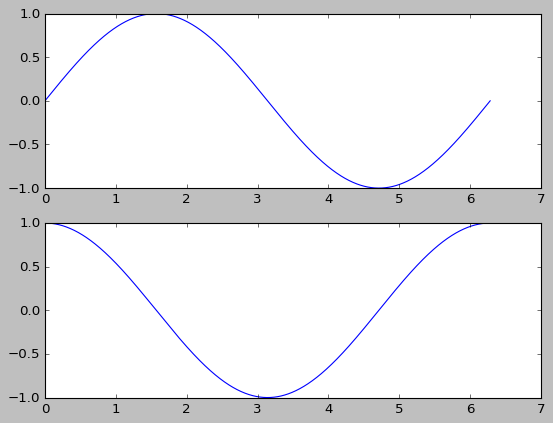

In [22]:
# First create a grid of plots
# ax will be an array of two Axes objects
fig, ax = plt.subplots(2)
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x))

En el caso de los gráficos más sencillos, la elección de qué estilo utilizar es en gran medida una **cuestión de preferencia, pero el enfoque orientado a objetos puede convertirse en una necesidad a medida que los gráficos se vuelven más complicados.**
A lo largo de este capítulo, cambiaremos entre el estilo MATLAB y las interfaces orientadas a objetos, dependiendo de lo que sea más conveniente.
En la mayoría de los casos, la diferencia es tan pequeña como cambiar de ``plt.plot()`` a ``ax.plot()``, pero hay algunos inconvenientes que destacaremos a medida que surjan en las siguientes secciones.

<table align="left">
 <tr><td width="80"><img src="./img/ejercicio.png" style="width:auto;height:auto"></td>
     <td style="text-align:left">
         <h3>Ejercicio plot orientado a objetos</h3>

      
<ol>
    <li>Crea una figura con 1 fila y 2 columnas</li>
    <li>Representa en la primera el cardioide en cartesianas</li>
    <li>Representa en la segunda el caso en polares</li>
    <li>Ahora hazlo en 2 columnas y 1 fila</li>
    <li>Guarda las dos figuras en la carpeta img</li>
</ol>
         
 </td></tr>
</table>

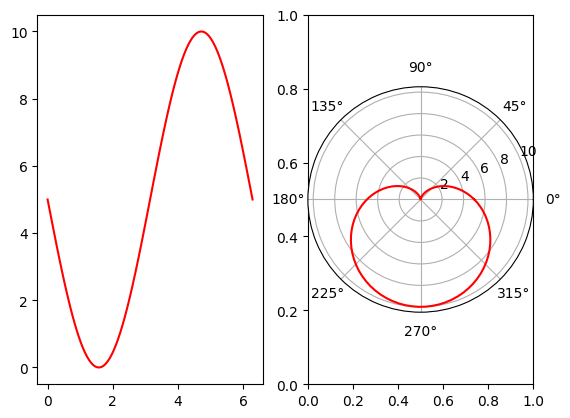

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2*np.pi, 100)

fig, ax = plt.subplots(1, 2)
ax[0].plot(x, 5-5*np.sin(x), color="red")
polar_ax = fig.add_subplot(1, 2, 2, projection="polar")
polar_ax.plot(x, 5-5*np.sin(x), '-', color="red")
fig.savefig('columns.png')
plt.show()

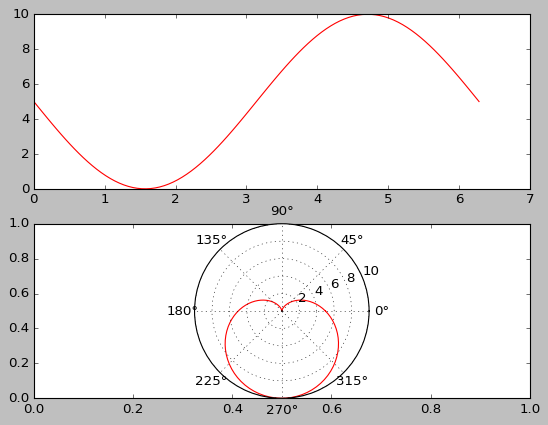

In [45]:
x = np.linspace(0, 2*np.pi, 100)

fig, ax = plt.subplots(2)
ax[0].plot(x, 5-5*np.sin(x), color="red")
polar_ax = fig.add_subplot(2, 1, 2, projection="polar")
polar_ax.plot(x, 5-5*np.sin(x), '-', color="red")
fig.savefig('filas.png')
plt.show()

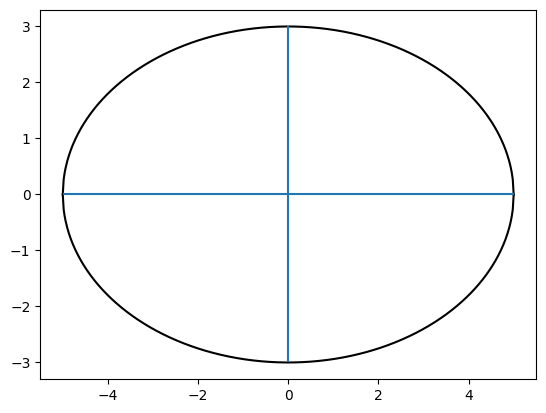

In [8]:
x = np.linspace(-5, 5, 500)
y = 3*np.sqrt(1-(x/5)**2)

plt.plot(x, y, color="k")
plt.plot(x, -y, color="k")

plt.vlines(0, ymin=-3, ymax=3)
plt.hlines(0, xmin=-5, xmax=5)
plt.show()

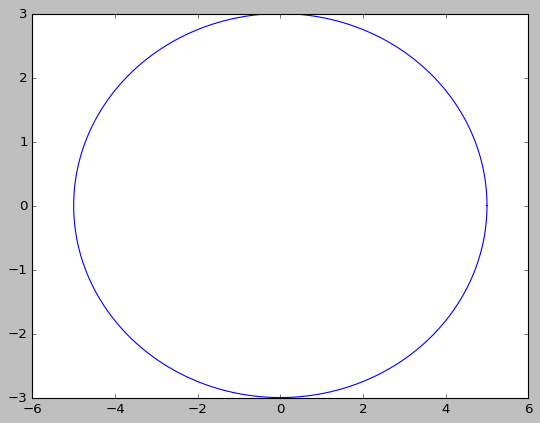

In [73]:
theta = np.linspace(0, 2*np.pi, 200)
x = 5*np.cos(theta)
y = 3*np.sin(theta)

plt.plot(x,y)
plt.show()


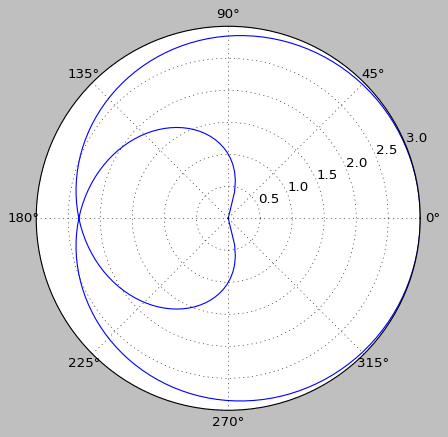

In [58]:
x = np.linspace(-5, 5, 200)
y = np.sqrt(9 - (9 * x**2) / 25)

plt.polar(x, y)
plt.show()

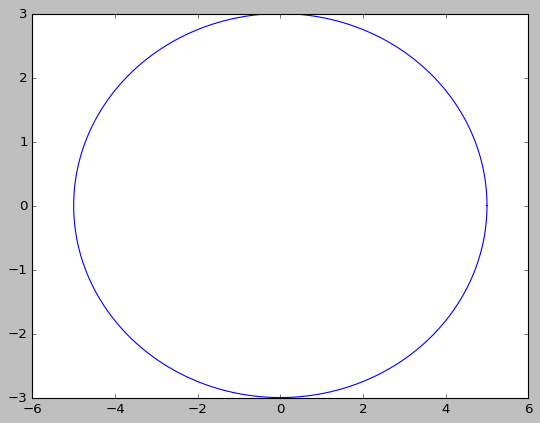

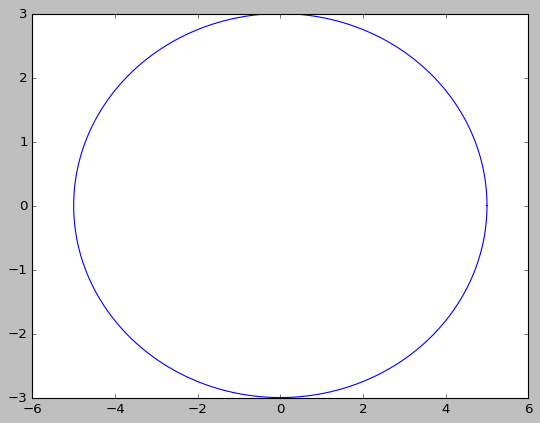

In [72]:
import numpy as np
import matplotlib.pyplot as plt

theta = np.linspace(0, 2*np.pi, 200)
x = 5*np.cos(theta)
y = 3*np.sin(theta)

plt.plot(x,y)
plt.show()

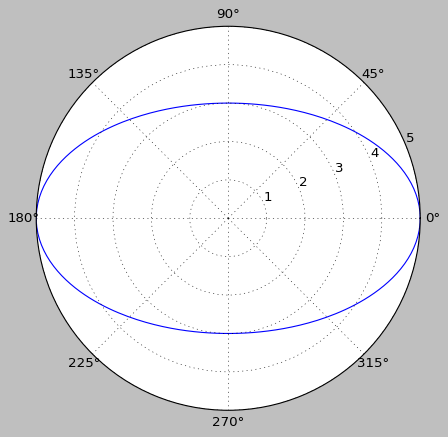

In [60]:

theta = np.linspace(0, 2*np.pi, 200)
a = 5
b = 3
r = (a * b) / np.sqrt((b * np.cos(theta))**2 + (a * np.sin(theta))**2)

plt.polar(theta, r)
plt.show()

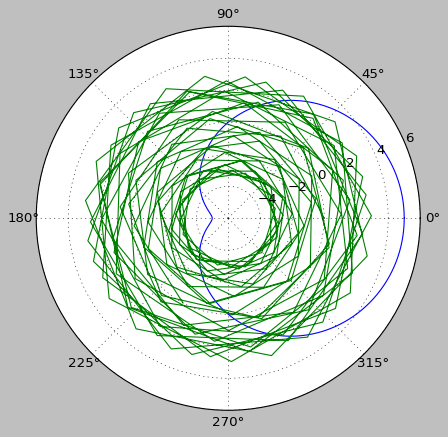

In [62]:

theta = np.linspace(0, 2*np.pi, 200)

plt.polar(theta, 5*np.cos(theta), 3*np.sin(theta))
plt.show()